In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [95]:
customer_data = pd.read_csv("Mall_Customers.csv")
print(customer_data)

print(customer_data.columns)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      

In [96]:
print(customer_data.head())
print(customer_data['Age'].describe())

# Вычисление стандартного отклонения для столбца 'Age'
print(customer_data['Age'].std())

# Вывод сводной статистики для столбца 'Annual Income (k$)'
print(customer_data['Annual Income (k$)'].describe())

# Вычисление стандартного отклонения для столбца 'Annual Income (k$)'
print(customer_data['Annual Income (k$)'].std())
print(customer_data['Spending Score (1-100)'].std())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64
13.969007331558883
count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64
26.264721165271254
25.823521668370162


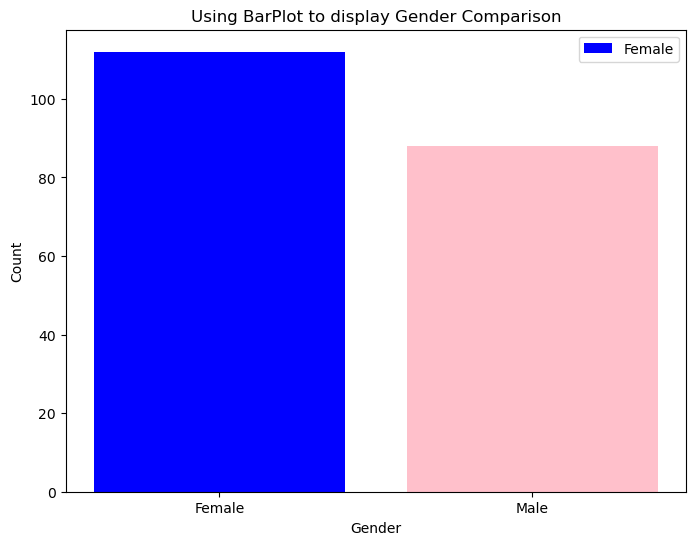

In [97]:
# Создание таблицы частот для столбца 'Gender'
gender_counts = customer_data['Gender'].value_counts()

# Создание столбчатой диаграммы
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.title('Using BarPlot to display Gender Comparison')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.legend(gender_counts.index)
plt.show()

In [98]:
def age_group(row):
    if row["Age"] <= 19:
        return "Teenager"
    elif 19 < row["Age"] <= 35:
        return "Young Adult"
    elif 35 < row["Age"] <= 50:
        return "Middle-aged Adult"
    elif 50 < row["Age"] <= 64:
        return "Late Adult"
    else:
        return "Seniors"

In [99]:
customer_data["Age Categoty"] = customer_data.apply(age_group, axis=1)

In [100]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Categoty
0,1,Male,19,15,39,Teenager
1,2,Male,21,15,81,Young Adult
2,3,Female,20,16,6,Young Adult
3,4,Female,23,16,77,Young Adult
4,5,Female,31,17,40,Young Adult


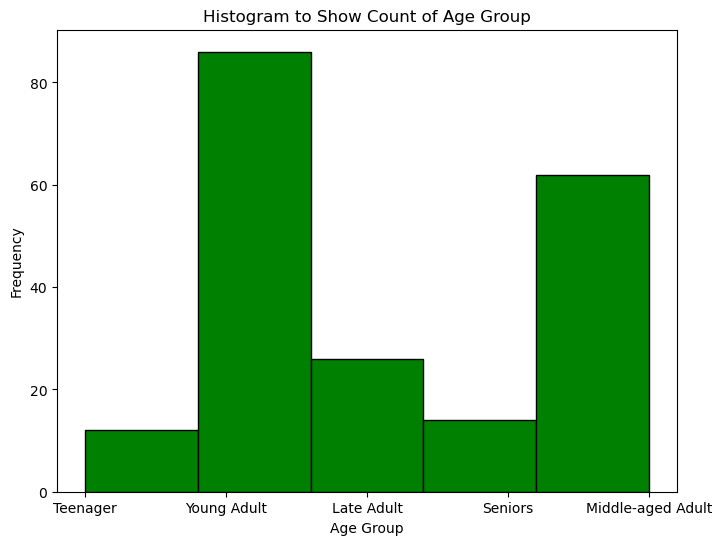

In [101]:
plt.figure(figsize=(8, 6))
plt.hist(customer_data['Age Categoty'], color='green', edgecolor='black', bins=5)
plt.title('Histogram to Show Count of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

In [102]:
###############################################################################################

Далее рассмотрим задачу классификации заболеваний. Есть набор данных, содержащий 134 столбца и 4920 строк. Каждая строка соответствует уникальному случаю, а каждый столбец представляет отдельный признак. Признаками являются симптомы, а целевой переменной является прогноз, указывающий на прогнозируемый исход или класс для каждого случая.

В столбцах представлены различные симптомы, наблюдаемые у пациентов. Эти симптомы могут варьироваться от общих показателей, таких как лихорадка и кашель, до более специфических, в зависимости от характера рассматриваемых заболеваний. Эти признаки играют решающую роль в процессе классификации, поскольку они являются входными переменными, используемыми алгоритмом для составления прогнозов.

In [103]:
df_train = pd.read_csv('Training.csv')
df_test = pd.read_csv('Testing.csv')

### Обучающий набор данных

In [104]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [105]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [106]:
df_train['Unnamed: 133'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4920 entries, 0 to 4919
Series name: Unnamed: 133
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 38.6 KB


In [107]:
df_train.shape

(4920, 134)

In [108]:
df_train.drop('Unnamed: 133',axis = 1,inplace = True)

In [109]:
prognosis = df_train['prognosis'].unique()
prognosis

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [110]:
len(prognosis)

41

In [111]:
class_counts = df_train['prognosis'].value_counts()
class_counts

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

### Тестовый набор данных

In [112]:
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [113]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [114]:
df_test.shape

(42, 133)

### Предварительный анализ данных (EDA)

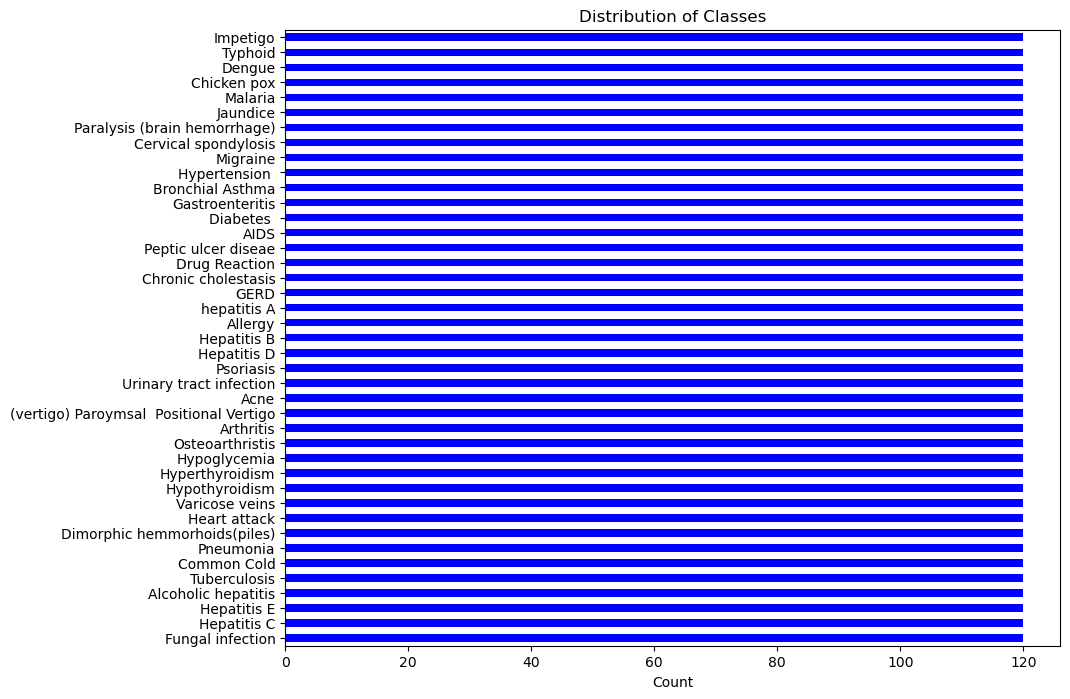

In [115]:
class_count = df_train['prognosis']

plt.figure(figsize = (10,8))
class_counts.plot(kind = 'barh',color = 'blue')
plt.xlabel('Count')
plt.title('Distribution of Classes')
plt.show()

In [116]:
# Преобразования категориальных данных в числовые
encoder = LabelEncoder()
df_train['diagnosis'] = encoder.fit_transform(df_train['prognosis'])
df_train['diagnosis'].unique()

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [117]:
y = df_train['diagnosis']
x = df_train.drop(['prognosis','diagnosis'],axis=1)

In [118]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators= 7),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [119]:
def train_model_and_evaluate(x,y,models):
    # Выполнение разделения данных для обучения и построения прогноза
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,
                                                       test_size = 0.3,random_state = 45)
    
    # Задание пустого списка для сохранения результатов
    result_list = []
    
    for model_name,model in models.items():
        # Обучение модели
        model.fit(x_train,y_train)
        
        # Предсказания целевых переменных для обучающего и валидационного набора данных
        y_train_pred = model.predict(x_train)
        y_valid_pred = model.predict(x_valid)
        
        
        # Проверка точности каждого прогноза
        train_accuracy = accuracy_score(y_train,y_train_pred)
        vald_accuracy = accuracy_score(y_valid,y_valid_pred)
        
        # Сохранение результата
        result_list.append({
            'Model': model_name,
            'Training Accuracy': train_accuracy,
            'Validation Accuracy': vald_accuracy
        })
        
    # Создание результирующего датафрейма
    result_df = pd.DataFrame(result_list)
        
    return result_df

In [120]:
%%time
result_df = train_model_and_evaluate(x,y,classification_models)

Wall time: 24.3 s


In [121]:
result_df

,Model,Training Accuracy,Validation Accuracy
0,Logistic Regression,1.0,1.0
1,Decision Tree,1.0,1.0
2,Random Forest,1.0,1.0
3,Gradient Boosting,1.0,1.0
4,SVM,1.0,1.0
5,K-Nearest Neighbors,1.0,1.0


### Тестирование

In [122]:
# Преобразования категориальных данных в числовые
encoder = LabelEncoder()
df_test['diagnosis'] = encoder.fit_transform(df_test['prognosis'])

In [123]:
y2 = df_test['diagnosis']
x2 = df_test.drop(['diagnosis','prognosis'],axis = 1)

In [124]:
def test_model_and_evaluate(x,y,x1,y1,models):
    # Выполнение разделения данных для обучения и построения прогноза
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,
                                                       test_size = 0.3,random_state = 45)
    
    # Задание пустого списка для сохранения результатов
    result_list = []
    
    for model_name,model in models.items():
        # Обучение модели
        model.fit(x_train,y_train)
        
        # Предсказания целевых переменных для обучающего и валидационного набора данных
        y_test_pred = model.predict(x1)
        
        # Проверка точности каждого прогноза
        test_accuracy = accuracy_score(y1,y_test_pred)
        
        # Сохранение результата
        result_list.append({
            'Model': model_name,
            'Test Accuracy': test_accuracy 
        })
        
    # Создание результирующего датафрейма
    result_df = pd.DataFrame(result_list)
        
    return result_df

In [125]:
%%time
result_df2 = test_model_and_evaluate(x,y,x2,y2,classification_models)

Wall time: 24 s


In [126]:
result_df2

,Model,Test Accuracy
0,Logistic Regression,1.00000
1,Decision Tree,0.97619
2,Random Forest,0.97619
3,Gradient Boosting,0.97619
4,SVM,1.00000
5,K-Nearest Neighbors,1.00000


In [127]:
def train_and_evaluate_model(model, x_train, y_train, x_valid, y_valid):
    start_time = time.time()
    model.fit(x_train, y_train)
    train_time = time.time() - start_time

    y_train_pred = model.predict(x_train)
    y_valid_pred = model.predict(x_valid)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)

    return train_accuracy, valid_accuracy, train_time

In [128]:
def train_and_evaluate_models(x, y, models):
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=45)

    result_list = []
    for model_name, model in models.items():
        train_accuracy, valid_accuracy, train_time = train_and_evaluate_model(model, x_train, y_train, x_valid, y_valid)

        result_list.append({
            'Model': model_name,
            'Training Accuracy': train_accuracy,
            'Validation Accuracy': valid_accuracy,
            'Training Time': train_time
        })

    result_df = pd.DataFrame(result_list)
    return result_df

In [129]:
# Обучение и оценка моделей на обучающем наборе данных
result_df = train_and_evaluate_models(x, y, classification_models)

print(result_df)

                 Model  Training Accuracy  Validation Accuracy  Training Time
0  Logistic Regression                1.0                  1.0       0.135923
1        Decision Tree                1.0                  1.0       0.029981
2        Random Forest                1.0                  1.0       0.028998
3    Gradient Boosting                1.0                  1.0      23.830369
4                  SVM                1.0                  1.0       0.177908
5  K-Nearest Neighbors                1.0                  1.0       0.002998


### Результаты

#### Интерпретация результатов:

**Точность обучения (Training Accuracy)** Все модели показали 100% точность на обучающем наборе данных, что означает, что модели обучены прекрасно. Это хороший показатель, показывающий, что модели могут запоминать обучающие данные и обучаться довольно хорошо.

**Точность валидации (Validation Accuracy)** Также все модели показали 100% точность на валидационном наборе данных. Это означает, что модели хорошо обобщаются на новых данных, которые они не видели во время обучения.

**Время обучения (Training Time)** Время обучения различается значительно. Наиболее быстро обучается логистическая регрессия, затем дерево решений и случайный лес. Градиентный бустинг требует наибольшего времени обучения, что может быть признаком переобучения модели. Обучение методом логистической регрессии и методом опорных векторов занимает больше времени, чем другие модели.

<hr>

#### Анализ эффективности модели:

**Логистическая регрессия** Это простая и быстрая модель, которая хорошо работает на небольших наборах данных и выдает хорошие результаты.

**Дерево решений и случайный лес** Эти модели также быстро обучаются и выдают хорошие результаты, особенно если дерево решений не переобучено.

**Градиентный бустинг** Это мощная модель, которая может давать очень хорошие результаты, если настроена правильно. Однако, если неправильно настроена, она может переобучиться, что приведет к низкой точности на валидационном наборе данных.

**Метод опорных векторов (SVM)** Эта модель может давать хорошие результаты, но требует большего времени обучения, чем другие модели.

**Метод ближайших соседей (K-Nearest Neighbors)** Эта модель также быстро обучается, но может быть медленной на больших наборах данных, так как она вычисляет расстояние до всех обучающих примеров.

<hr>

*В целом, все модели показали хорошие результаты, но лучшей моделью будет Gradient Boosting, так как она обучилась довольно хорошо и имеет хорошую обобщающую способность. Однако, если вам нужна модель, которая будет работать быстрее, можно рассмотреть логистическую регрессию или дерево решений. Если важны большие объемы данных и скорость обработки, можно рассмотреть метод опорных векторов или метод ближайших соседей.*